In [37]:
import pandas as pd
import ast
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [38]:
# df = pd.read_csv('csv_results/result_15.csv')
df = pd.read_csv('csv_results_mercury/result_1.csv')
df

,seed,True,ARMA,Informer,Informer_para,Informer_lr,RNN
0,32,"[0.8919009554410655, 0.3430863057232868, -0.83...","[1.0708670034446492, 0.045295010274625847, 0.0...","[1.1966965, 0.48449352, 0.48053518, -1.0345657...","(100, 20)",0.0001,"[0.6491079330444336, 0.12384466826915741, 0.12..."
1,63,"[1.5183510787843302, 2.3937143568473545, 2.542...","[0.3674664350554853, 1.209100590949312, 1.3073...","[1.144542, 1.959897, 1.818185, 1.559114, -0.09...","(100, 20)",0.0001,"[0.5653344392776489, 1.3425542116165161, 1.548..."
2,78,"[-1.786411214463587, -1.8354435815308485, -1.2...","[-0.674789029181795, -1.1568657175212, -0.9246...","[0.14438237, -0.26574555, -0.24081092, -0.0401...","(100, 20)",0.0001,"[-0.7576165199279785, -1.0661358833312988, -0...."
3,38,"[-1.5664670941876349, 0.15243834229327857, 0.9...","[-0.6373852795937724, -0.9784189595233136, 0.8...","[-0.4491887, -0.75680625, 1.0369834, 0.9351699...","(100, 20)",0.0001,"[-0.5861457586288452, -0.8535881638526917, 0.9..."
4,27,"[0.5433834014821325, -0.2813752169572461, -1.6...","[0.574373755153217, 0.14440912969110514, -0.42...","[0.19811946, 0.15935734, -0.34550932, -0.84263...","(100, 20)",0.0001,"[0.9263922572135925, 0.06130915880203247, -0.3..."
...,...,...,...,...,...,...,...
95,7,"[-1.7962881168495544, -1.2732067659801491, 0.8...","[-1.6979879477709359, -0.7454477828226362, -0....","[-0.39835575, -1.1449649, -0.14247452, 1.25275...","(100, 20)",0.0001,"[-1.4925662279129028, -1.0747333765029907, -0...."
96,3,"[-0.8002904057913294, 1.0290506471787033, 0.44...","[-1.2886888740179439, 0.24135002740936684, 1.0...","[-1.3385926, -0.18687144, 1.1797321, 0.4450081...","(100, 20)",0.0001,"[-1.234893798828125, 0.03732439875602722, 1.11..."
97,4,"[2.067124107644449, 2.5686384206666197, 1.5486...","[-0.6934151274067015, 2.3776218608914856, 0.77...","[-1.2527273, 2.6468005, 1.9756417, 0.23603027,...","(100, 20)",0.0001,"[-0.5714408159255981, 2.3755106925964355, 1.08..."
98,11,"[1.220552242568979, 0.6384145957159848, -0.789...","[0.6584036722912792, 0.7042699585827898, -0.01...","[0.8233421, 1.2292094, -0.19620118, -0.8884132...","(100, 20)",0.0001,"[0.668007493019104, 0.6348965764045715, 0.1690..."


In [39]:
# arma_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
# informer_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['Informer'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
# # rnn_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['RNN'].apply(ast.literal_eval).to_list()),multioutput='raw_values')

arma_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
informer_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['Informer'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
rnn_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['RNN'].apply(ast.literal_eval).to_list()),multioutput='raw_values')


In [40]:
informer_select = np.array(df['Informer_para'].apply(ast.literal_eval).to_list())[:,0]
informer_lr_select = np.array(df['Informer_lr'].to_list())
informer_select

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100])

In [41]:
# informer_lr_select

In [42]:


# # Plotting the array
# plt.figure(figsize=(10, 5))
# # plt.plot(rnn_mse,label = 'RNN', marker='o')  # Using 'o' as a marker for each data point
# plt.plot(informer_mse,label = 'Informer', marker='o')  # Using 'o' as a marker for each data point
# plt.plot(arma_mse,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point
# plt.title('Plot of test MSE')
# plt.xlabel('MSE')
# plt.ylabel('Value')
# plt.grid(True)
# plt.legend()
# plt.show()


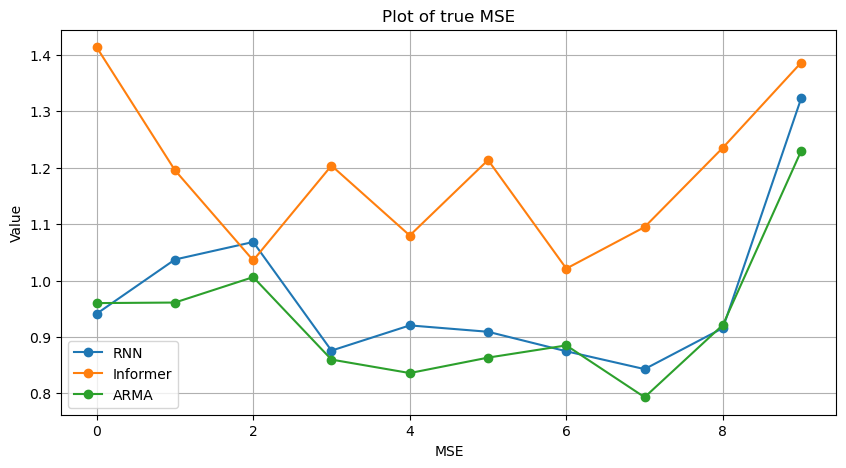

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the array
plt.figure(figsize=(10, 5))
plt.plot(rnn_mse_true,label = 'RNN', marker='o')  # Using 'o' as a marker for each data point
plt.plot(informer_mse_true,label = 'Informer', marker='o')  # Using 'o' as a marker for each data point
plt.plot(arma_mse_true,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of true MSE')
plt.xlabel('MSE')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


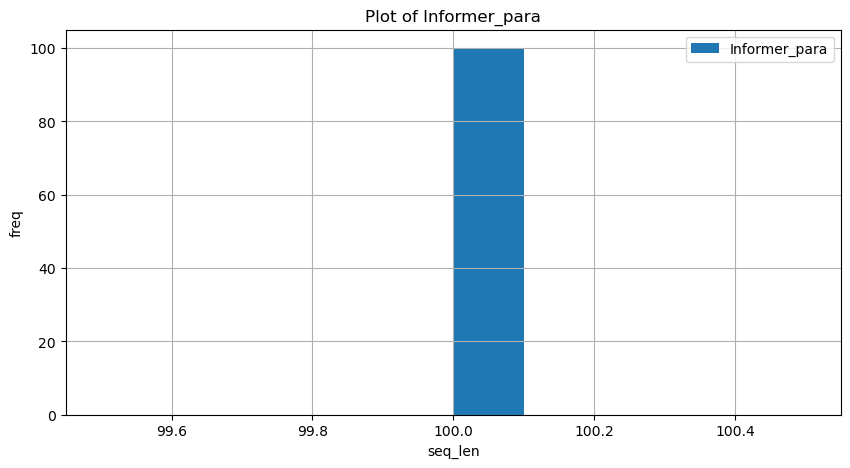

In [44]:

# Plotting the array
plt.figure(figsize=(10, 5))
plt.hist(informer_select,label = 'Informer_para')  # Using 'o' as a marker for each data point
plt.title('Plot of Informer_para')
plt.xlabel('seq_len')
plt.ylabel('freq')
plt.grid(True)
plt.legend()
plt.show()

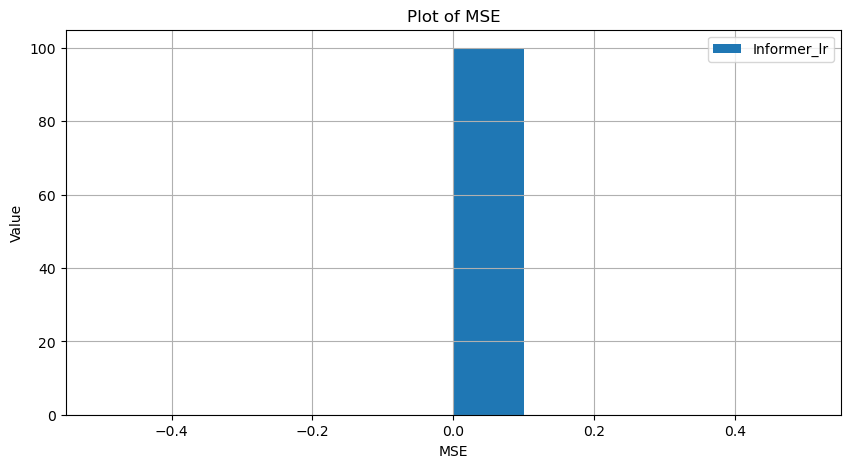

In [45]:
plt.figure(figsize=(10, 5))
plt.hist(informer_lr_select,label = 'Informer_lr')  # Using 'o' as a marker for each data point
plt.title('Plot of MSE')
plt.xlabel('MSE')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()